In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
 # load CSV
housing_data = "Resources/housing_data.csv"

## Original dataframe

In [3]:
 # Read in US housing data set
housing_pd = pd.read_csv(housing_data)
housing_pd.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [4]:
# Print information about us housing dataframe
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

## Copy of original dataframe

In [5]:
# Create copy of original dataframe 
us_housing_df = housing_pd.copy()
us_housing_df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [6]:
us_housing_df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [7]:
# Print out all columns in dataframe
us_housing_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

## Select necessary columns

In [8]:
# Select columns we need
us_housing_df = us_housing_df[['region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'lat',
       'long', 'state']]
us_housing_df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca


In [9]:
# Create a new column for price per sqfeet
us_housing_df["price_per_sqft"] = us_housing_df["price"] / us_housing_df["sqfeet"]
us_housing_df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,price_per_sqft
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca,1.064935
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca,1.198801
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca,1.077243
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca,1.546610
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca,1.156000


In [10]:
# Reorganize columns so it's easier to read
column_names = ['state', 'region', 'type', 'price','sqfeet', 'price_per_sqft', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'lat',
       'long']
us_housing_df = us_housing_df.reindex(columns=column_names)
us_housing_df.head()

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,ca,reno / tahoe,apartment,1148,1078,1.064935,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796
1,ca,reno / tahoe,condo,1200,1001,1.198801,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789
2,ca,reno / tahoe,apartment,1813,1683,1.077243,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708
3,ca,reno / tahoe,apartment,1095,708,1.546610,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805


In [11]:
# us_housing_df.groupby(["type"])
# type = us_housing_df["id"].count()
# type

us_groupby = us_housing_df.groupby(["type"])
us_groupby.count()

,state,region,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
type,,,,,,,,,,,,,,,,,
apartment,318032,318032,318032,318032,318032,318032,318032,318032,318032,318032,318032,318032,318032,250734,192087,316744,316744
assisted living,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
condo,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,6238,5196,4857,6214,6214
cottage/cabin,861,861,861,861,861,861,861,861,861,861,861,861,861,775,661,854,854
duplex,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047,5047,4773,4663,5020,5020
flat,531,531,531,531,531,531,531,531,531,531,531,531,531,495,483,528,528
house,33266,33266,33266,33266,33266,33266,33266,33266,33266,33266,33266,33266,33266,24061,23898,32809,32809
in-law,172,172,172,172,172,172,172,172,172,172,172,172,172,155,154,171,171
land,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


## Row level check and filter
- check each column for missing values, data integrity and validation, etc.

In [12]:
#show all price that equal 0
us_housing_df.loc[us_housing_df["price"]==0,:].head()

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
2205,ca,sacramento,apartment,0,500,0.0,1,1.0,0,0,1,0,0,0,NaN,NaN,38.4718,-121.427
3351,ca,sacramento,apartment,0,500,0.0,1,1.0,0,0,1,0,0,0,NaN,NaN,38.4718,-121.427
3375,ca,sacramento,apartment,0,500,0.0,1,1.0,0,0,1,0,0,0,NaN,NaN,38.4718,-121.427
3474,ca,sacramento,apartment,0,500,0.0,1,1.0,0,0,1,0,0,0,NaN,NaN,38.4718,-121.427
3486,ca,sacramento,apartment,0,500,0.0,1,1.0,0,0,1,0,0,0,NaN,NaN,38.4718,-121.427


In [13]:
# drop all prices that equal 0
us_housing_df.drop(us_housing_df.index[us_housing_df['price'] == 0], inplace=True)

In [14]:
#show all sqfeet that equal 0
us_housing_df.loc[us_housing_df["sqfeet"]==0,:].head()

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
32174,dc,"washington, DC",townhouse,2200,0,inf,4,2.5,1,1,1,0,0,0,w/d in unit,street parking,39.2998,-76.6075
43679,fl,lakeland,duplex,900,0,inf,2,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,28.0452,-81.7325
43730,fl,lakeland,house,1100,0,inf,3,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,28.0381,-81.9392
43932,fl,lakeland,house,1100,0,inf,3,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,28.0381,-81.9392
44270,fl,lakeland,house,1100,0,inf,3,1.0,1,1,1,0,0,0,w/d hookups,off-street parking,28.0381,-81.9392


In [15]:
# drop all sqfeet that equal 0
us_housing_df.drop(us_housing_df.index[us_housing_df['sqfeet'] == 0], inplace=True)

## Reminder - delete test file

In [16]:
# Create test file to see if prices/sqfeet with 0's are dropped
# Export file as a CSV, with index, and with the header
# us_housing_df.to_csv("Resources/test.csv", index=True, header=True)

In [16]:
#check which columns still need cleaning (e.g, laundry, parking, lat, lng) 
us_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383622 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   state                    383622 non-null  object 
 1   region                   383622 non-null  object 
 2   type                     383622 non-null  object 
 3   price                    383622 non-null  int64  
 4   sqfeet                   383622 non-null  int64  
 5   price_per_sqft           383622 non-null  float64
 6   beds                     383622 non-null  int64  
 7   baths                    383622 non-null  float64
 8   cats_allowed             383622 non-null  int64  
 9   dogs_allowed             383622 non-null  int64  
 10  smoking_allowed          383622 non-null  int64  
 11  wheelchair_access        383622 non-null  int64  
 12  electric_vehicle_charge  383622 non-null  int64  
 13  comes_furnished          383622 non-null  int64  
 14  laun

In [17]:
# show laundry options where there are blanks
us_housing_df.loc[us_housing_df["laundry_options"].isna()==True,:].head()


,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
10,ca,reno / tahoe,apartment,1086,720,1.508333,1,1.0,0,0,1,0,0,0,NaN,NaN,39.4572,-119.776
25,ca,reno / tahoe,apartment,1392,987,1.410334,2,2.0,1,1,1,0,0,0,NaN,carport,39.5362,-119.736
26,ca,reno / tahoe,townhouse,1075,790,1.360759,1,1.0,1,0,1,0,0,0,NaN,off-street parking,NaN,NaN
32,ca,reno / tahoe,apartment,1075,800,1.343750,2,1.0,0,0,1,0,0,0,NaN,off-street parking,39.5354,-119.837
39,ca,reno / tahoe,apartment,1229,790,1.555696,1,1.0,0,0,1,0,0,0,NaN,NaN,39.5207,-119.871


In [18]:
# since this column is category, we use mode to replace values
mode_laundry_options = us_housing_df["laundry_options"].mode()
#show mode
mode_laundry_options = mode_laundry_options.values[0]

In [19]:
mode_laundry_options

'w/d in unit'

In [20]:
# fill in blank laundry_options with w/d in unit
us_housing_df["laundry_options"] = us_housing_df["laundry_options"].fillna(mode_laundry_options)

In [21]:
#do another info check to see if laundry got filled with mode
us_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383622 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   state                    383622 non-null  object 
 1   region                   383622 non-null  object 
 2   type                     383622 non-null  object 
 3   price                    383622 non-null  int64  
 4   sqfeet                   383622 non-null  int64  
 5   price_per_sqft           383622 non-null  float64
 6   beds                     383622 non-null  int64  
 7   baths                    383622 non-null  float64
 8   cats_allowed             383622 non-null  int64  
 9   dogs_allowed             383622 non-null  int64  
 10  smoking_allowed          383622 non-null  int64  
 11  wheelchair_access        383622 non-null  int64  
 12  electric_vehicle_charge  383622 non-null  int64  
 13  comes_furnished          383622 non-null  int64  
 14  laun

In [22]:
# show parking options where there are blanks
us_housing_df.loc[us_housing_df["parking_options"].isna()==True,:].head()

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805
5,ca,reno / tahoe,apartment,1093,720,1.518056,1,1.0,1,1,1,0,0,0,laundry in bldg,NaN,39.4572,-119.776
10,ca,reno / tahoe,apartment,1086,720,1.508333,1,1.0,0,0,1,0,0,0,w/d in unit,NaN,39.4572,-119.776
13,ca,reno / tahoe,apartment,1349,766,1.761097,1,1.0,1,1,0,0,0,0,w/d in unit,NaN,39.5393,-119.750
31,ca,reno / tahoe,apartment,1720,1256,1.369427,3,2.0,1,1,0,0,0,0,w/d in unit,NaN,39.5502,-119.718


In [23]:
# since this column is category, we use mode to replace values
mode_parking_options = us_housing_df["parking_options"].mode()
#show mode
mode_parking_options = mode_parking_options.values[0]

In [24]:
mode_parking_options

'off-street parking'

In [25]:
# fill in blank parking_options with off-street parking
us_housing_df["parking_options"] = us_housing_df["parking_options"].fillna(mode_parking_options)

In [26]:
us_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383622 entries, 0 to 384976
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   state                    383622 non-null  object 
 1   region                   383622 non-null  object 
 2   type                     383622 non-null  object 
 3   price                    383622 non-null  int64  
 4   sqfeet                   383622 non-null  int64  
 5   price_per_sqft           383622 non-null  float64
 6   beds                     383622 non-null  int64  
 7   baths                    383622 non-null  float64
 8   cats_allowed             383622 non-null  int64  
 9   dogs_allowed             383622 non-null  int64  
 10  smoking_allowed          383622 non-null  int64  
 11  wheelchair_access        383622 non-null  int64  
 12  electric_vehicle_charge  383622 non-null  int64  
 13  comes_furnished          383622 non-null  int64  
 14  laun

In [27]:
# drop latutitude and longitude
us_housing_df = us_housing_df.drop(columns=["lat","long"])
us_housing_df

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,ca,reno / tahoe,apartment,1148,1078,1.064935,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,ca,reno / tahoe,condo,1200,1001,1.198801,2,2.0,0,0,0,0,0,0,w/d hookups,carport
2,ca,reno / tahoe,apartment,1813,1683,1.077243,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
3,ca,reno / tahoe,apartment,1095,708,1.546610,1,1.0,1,1,1,0,0,0,w/d in unit,carport
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,ca,reno / tahoe,apartment,1295,957,1.353187,2,2.0,1,1,1,0,0,0,w/d in unit,carport
384973,ca,reno / tahoe,apartment,1549,1034,1.498066,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking
384974,ca,reno / tahoe,apartment,1249,840,1.486905,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
384975,ca,reno / tahoe,apartment,1429,976,1.464139,2,2.0,1,1,1,0,0,0,w/d in unit,carport


In [28]:
us_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383622 entries, 0 to 384976
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   state                    383622 non-null  object 
 1   region                   383622 non-null  object 
 2   type                     383622 non-null  object 
 3   price                    383622 non-null  int64  
 4   sqfeet                   383622 non-null  int64  
 5   price_per_sqft           383622 non-null  float64
 6   beds                     383622 non-null  int64  
 7   baths                    383622 non-null  float64
 8   cats_allowed             383622 non-null  int64  
 9   dogs_allowed             383622 non-null  int64  
 10  smoking_allowed          383622 non-null  int64  
 11  wheelchair_access        383622 non-null  int64  
 12  electric_vehicle_charge  383622 non-null  int64  
 13  comes_furnished          383622 non-null  int64  
 14  laun

## Dataframe for CA only

In [29]:
copy_housing_df = us_housing_df.copy()
copy_housing_df.head()

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,ca,reno / tahoe,apartment,1148,1078,1.064935,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,ca,reno / tahoe,condo,1200,1001,1.198801,2,2.0,0,0,0,0,0,0,w/d hookups,carport
2,ca,reno / tahoe,apartment,1813,1683,1.077243,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
3,ca,reno / tahoe,apartment,1095,708,1.546610,1,1.0,1,1,1,0,0,0,w/d in unit,carport
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking


In [30]:
ca_housing_df = us_housing_df.loc[us_housing_df["state"]=='ca',:]
ca_housing_df

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,ca,reno / tahoe,apartment,1148,1078,1.064935,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,ca,reno / tahoe,condo,1200,1001,1.198801,2,2.0,0,0,0,0,0,0,w/d hookups,carport
2,ca,reno / tahoe,apartment,1813,1683,1.077243,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
3,ca,reno / tahoe,apartment,1095,708,1.546610,1,1.0,1,1,1,0,0,0,w/d in unit,carport
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,ca,reno / tahoe,apartment,1295,957,1.353187,2,2.0,1,1,1,0,0,0,w/d in unit,carport
384973,ca,reno / tahoe,apartment,1549,1034,1.498066,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking
384974,ca,reno / tahoe,apartment,1249,840,1.486905,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
384975,ca,reno / tahoe,apartment,1429,976,1.464139,2,2.0,1,1,1,0,0,0,w/d in unit,carport


In [31]:
ca_groupby = ca_housing_df.groupby(["type"])
ca_groupby.count()

,state,region,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
type,,,,,,,,,,,,,,,
apartment,27175,27175,27175,27175,27175,27175,27175,27175,27175,27175,27175,27175,27175,27175,27175
condo,676,676,676,676,676,676,676,676,676,676,676,676,676,676,676
cottage/cabin,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154
duplex,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425
flat,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
house,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275
in-law,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
loft,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
manufactured,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92


In [32]:
# Dataframe of apartments in CA
ca_apt_housing_df = ca_housing_df.loc[ca_housing_df["type"]=='apartment',:]
ca_apt_housing_df

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,ca,reno / tahoe,apartment,1148,1078,1.064935,3,2.0,1,1,0,0,0,0,w/d in unit,carport
2,ca,reno / tahoe,apartment,1813,1683,1.077243,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
3,ca,reno / tahoe,apartment,1095,708,1.546610,1,1.0,1,1,1,0,0,0,w/d in unit,carport
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking
5,ca,reno / tahoe,apartment,1093,720,1.518056,1,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,ca,reno / tahoe,apartment,1295,957,1.353187,2,2.0,1,1,1,0,0,0,w/d in unit,carport
384973,ca,reno / tahoe,apartment,1549,1034,1.498066,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking
384974,ca,reno / tahoe,apartment,1249,840,1.486905,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
384975,ca,reno / tahoe,apartment,1429,976,1.464139,2,2.0,1,1,1,0,0,0,w/d in unit,carport


## Reminder - delete test file 2

In [39]:
# Create test file to see if data is clean
# Export file as a CSV, with index, and with the header
ca_apt_housing_df.to_csv("Resources/test2.csv", index=True, header=True)

In [33]:
# region_groupby = ca_apt_housing_df.groupby(["region"])
# region_groupby.count()

region_groupby = ca_apt_housing_df.groupby(["region"])
CA_count_df = pd.DataFrame(region_groupby.count())
CA_count_df.sort_values(["state"], ascending = False)

,state,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
region,,,,,,,,,,,,,,,
stockton,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395,2395
inland empire,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238
ventura county,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
orange county,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188
los angeles,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007
sacramento,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003,2003
san diego,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984,1984
SF bay area,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874,1874
fresno / madera,1771,1771,1771,1771,1771,1771,1771,1771,1771,1771,1771,1771,1771,1771,1771


## Final Dataframe - clean

In [34]:
#choose regions over 1000
ca_top_region = ca_apt_housing_df.loc[(ca_apt_housing_df["region"]=='stockton') | (ca_apt_housing_df["region"]=='inland empire') 
                                      | (ca_apt_housing_df["region"]=='ventura county') | (ca_apt_housing_df["region"]=='orange county')
                                      | (ca_apt_housing_df["region"]=='los angeles')| (ca_apt_housing_df["region"]=='sacramento') 
                                      | (ca_apt_housing_df["region"]=='san diego') | (ca_apt_housing_df["region"]=='SF bay area')
                                      | (ca_apt_housing_df["region"]=='fresno / madera') | (ca_apt_housing_df["region"]=='reno / tahoe') 
                                      | (ca_apt_housing_df["region"]=='bakersfield') | (ca_apt_housing_df["region"]=='modesto'), :]
ca_top_region


,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,ca,reno / tahoe,apartment,1148,1078,1.064935,3,2.0,1,1,0,0,0,0,w/d in unit,carport
2,ca,reno / tahoe,apartment,1813,1683,1.077243,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
3,ca,reno / tahoe,apartment,1095,708,1.546610,1,1.0,1,1,1,0,0,0,w/d in unit,carport
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking
5,ca,reno / tahoe,apartment,1093,720,1.518056,1,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,ca,reno / tahoe,apartment,1295,957,1.353187,2,2.0,1,1,1,0,0,0,w/d in unit,carport
384973,ca,reno / tahoe,apartment,1549,1034,1.498066,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking
384974,ca,reno / tahoe,apartment,1249,840,1.486905,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
384975,ca,reno / tahoe,apartment,1429,976,1.464139,2,2.0,1,1,1,0,0,0,w/d in unit,carport


In [38]:
# Create test file to see if data is clean
# Export file as a CSV, with index, and with the header
# ca_top_region.to_csv("Resources/test3.csv", index=True, header=True)

## Check for outliers

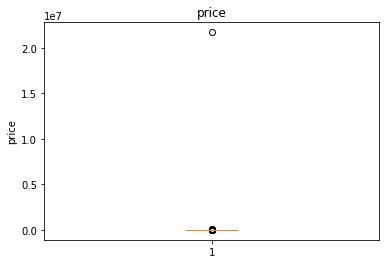

In [35]:
price = ca_top_region['price']

fig1, ax1 = plt.subplots()
ax1.set_title('price')
ax1.set_ylabel('price')
ax1.boxplot(price)
plt.savefig("Visualizations/Box Plot/Outliers", bbox_inches="tight")
plt.show()

In [36]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 1349.0
The upper quartile of price is: 2177.0
The interquartile range of price is: 828.0
The the median of price is: 1710.0 
Values below 107.0 could be outliers.
Values above 3419.0 could be outliers.


In [37]:
test = ca_top_region.loc[(ca_top_region['price']>3419)]
test

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
90,ca,reno / tahoe,apartment,3900,3300,1.181818,4,3.0,1,1,1,0,0,1,w/d in unit,off-street parking
1563,ca,sacramento,apartment,4300,1522,2.825230,2,2.0,1,1,0,1,1,1,w/d in unit,detached garage
1988,ca,sacramento,apartment,95834,1060,90.409434,2,2.0,0,0,1,0,0,0,w/d in unit,off-street parking
2599,ca,sacramento,apartment,3700,1957,1.890649,4,3.5,1,1,0,0,0,1,w/d in unit,off-street parking
2836,ca,sacramento,apartment,4300,1522,2.825230,2,2.0,1,1,1,0,0,0,w/d in unit,off-street parking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382348,ca,orange county,apartment,3518,1095,3.212785,2,2.0,0,0,1,0,0,0,w/d in unit,off-street parking
382404,ca,orange county,apartment,3470,1014,3.422091,1,1.0,1,1,0,1,1,0,w/d in unit,detached garage
382462,ca,orange county,apartment,3700,1120,3.303571,2,2.0,0,0,0,1,0,1,w/d in unit,attached garage
382583,ca,orange county,apartment,3541,1591,2.225644,3,3.0,1,1,1,1,0,0,w/d in unit,carport


In [38]:
#filter out outliers
ca_top_region = ca_top_region.loc[(ca_top_region['price'] > lower_bound) & (ca_top_region['price'] < upper_bound)]
ca_top_region

,state,region,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,ca,reno / tahoe,apartment,1148,1078,1.064935,3,2.0,1,1,0,0,0,0,w/d in unit,carport
2,ca,reno / tahoe,apartment,1813,1683,1.077243,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
3,ca,reno / tahoe,apartment,1095,708,1.546610,1,1.0,1,1,1,0,0,0,w/d in unit,carport
4,ca,reno / tahoe,apartment,289,250,1.156000,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking
5,ca,reno / tahoe,apartment,1093,720,1.518056,1,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,ca,reno / tahoe,apartment,1295,957,1.353187,2,2.0,1,1,1,0,0,0,w/d in unit,carport
384973,ca,reno / tahoe,apartment,1549,1034,1.498066,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking
384974,ca,reno / tahoe,apartment,1249,840,1.486905,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking
384975,ca,reno / tahoe,apartment,1429,976,1.464139,2,2.0,1,1,1,0,0,0,w/d in unit,carport


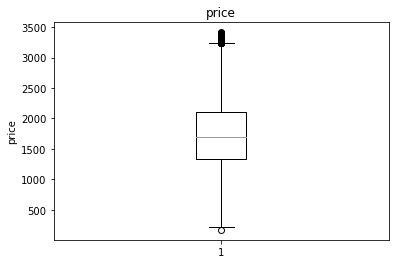

In [39]:
# Filtered out outliers
price2 = ca_top_region['price']

fig1, ax1 = plt.subplots()
ax1.set_title('price')
ax1.set_ylabel('price')
ax1.boxplot(price2)
plt.savefig("Visualizations/Box Plot/No_Outliers.png", bbox_inches="tight")
plt.show()

In [40]:
ca_top_region_grp = ca_top_region.groupby(["region"])
ca_top_region_grp_df = pd.DataFrame(ca_top_region_grp.count())
ca_top_region_grp_df.sort_values(["state"], ascending = False)

,state,type,price,sqfeet,price_per_sqft,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
region,,,,,,,,,,,,,,,
stockton,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357
inland empire,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236
ventura county,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162,2162
orange county,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152
sacramento,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998
san diego,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877
los angeles,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
fresno / madera,1770,1770,1770,1770,1770,1770,1770,1770,1770,1770,1770,1770,1770,1770,1770
reno / tahoe,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731


## Data Visualization

## Heatmap

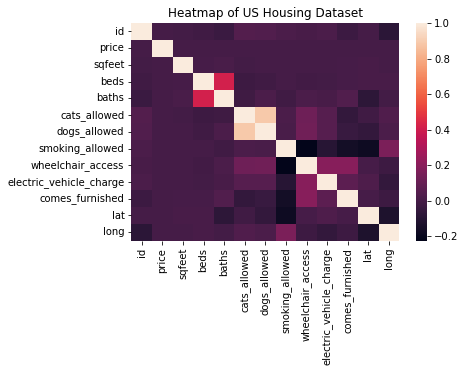

In [41]:
#all us housing
sns.heatmap(housing_pd.corr());
plt.title('Heatmap of US Housing Dataset')
plt.savefig("Visualizations/Heatmap/US_housing.png", bbox_inches="tight")

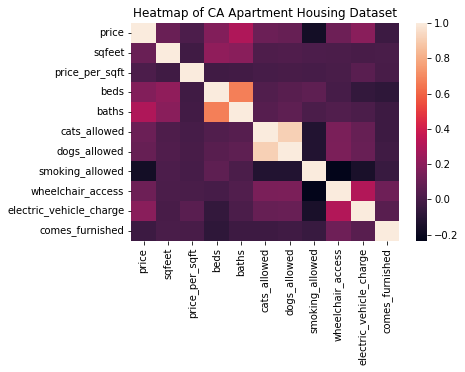

In [42]:
# top 10 regions for apartments
sns.heatmap(ca_top_region.corr());
plt.title('Heatmap of CA Apartment Housing Dataset')
plt.savefig("Visualizations/Heatmap/CA_apt.png", bbox_inches="tight")

## Bar Graph

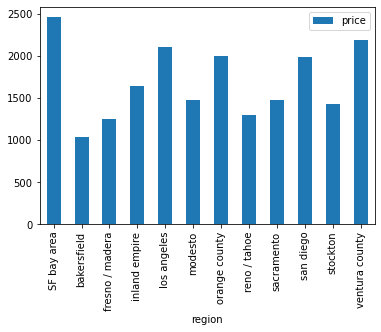

In [43]:
ca_top_region_bar_grp = ca_top_region.groupby("region",as_index=False).median()
ca_top_region_bar_grp.plot(kind="bar",y="price",x="region")
plt.savefig("Visualizations/Bar/Region_vs_Price.png", bbox_inches="tight")

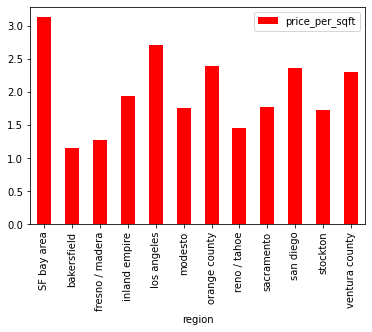

In [44]:
ca_top_region_price_per_sqfeet_grp = ca_top_region.groupby("region",as_index=False).median()
ca_top_region_price_per_sqfeet_grp.plot(kind="bar",y="price_per_sqft",x="region", color="red")
plt.savefig("Visualizations/Bar/Region_vs_Price_per_sqfeet.png", bbox_inches="tight")

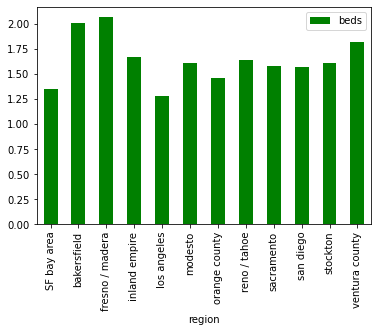

In [45]:
ca_top_type_bar_grp = ca_top_region.groupby("region",as_index=False).mean()
ca_top_type_bar_grp.plot(kind="bar",y="beds",x="region", color="green")
plt.savefig("Visualizations/Bar/Region_vs_Beds.png", bbox_inches="tight")

## Scatterplot

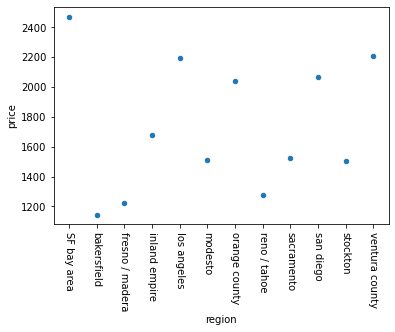

In [46]:
ca_top_region_scatter_grp = ca_top_region.groupby("region",as_index=False).mean()
ca_top_region_scatter_grp.plot(kind="scatter",y="price",x="region",rot=270)
plt.savefig("Visualizations/Scatter/Region_vs_Price.png", bbox_inches="tight")

In [47]:
region_count = ca_top_region.groupby("region")["price"].count()
region_percent = round((region_count/22878),2)
region_df = pd.DataFrame({"Count": region_count, "Percent": region_percent})
region_df

,Count,Percent
region,,
SF bay area,1430,0.06
bakersfield,1416,0.06
fresno / madera,1770,0.08
inland empire,2236,0.10
los angeles,1775,0.08
modesto,1060,0.05
orange county,2152,0.09
reno / tahoe,1731,0.08
sacramento,1998,0.09


In [48]:
region_df.index

Index(['SF bay area', 'bakersfield', 'fresno / madera', 'inland empire',
       'los angeles', 'modesto', 'orange county', 'reno / tahoe', 'sacramento',
       'san diego', 'stockton', 'ventura county'],
      dtype='object', name='region')

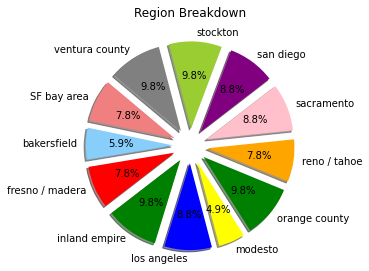

In [49]:
# Labels for the sections of our pie chart
labels = ['SF bay area', 'bakersfield', 'fresno / madera', 'inland empire',
       'los angeles', 'modesto', 'orange county', 'reno / tahoe', 'sacramento',
       'san diego', 'stockton', 'ventura county']

# The values of each section of the pie chart
sizes = [0.08, 0.06, 0.08, 0.10, 0.09, 0.05, 0.10, 0.08, 0.09, 0.09, 0.10,0.10]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "red", "green", "blue", "yellow", "green", "orange", "pink", "purple", "yellowgreen", "gray" ]

# Tells matplotlib to separate the "females" section from the males
explode = (0.2, 0.2, 0.2, 0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2 )

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Region Breakdown",pad=20)
plt.savefig("Visualizations/Pie/Region_pie.png", bbox_inches="tight")
plt.show()


## Linear regression

In [50]:
#pearsonr - price and sqfeet
price = ca_top_region.iloc[:,3]
sqfeet = ca_top_region.iloc[:,4]
correlation = st.pearsonr(price,sqfeet)
print(f"The correlation between both factors is {correlation[0]}")

The correlation between both factors is 0.10068156027499882


## ANOVA
- Null Hypothesis test: Region does not affect pricing
- Result: Since p-value is less than 0.05, our null hypothesis is not true and region does affect pricing

In [56]:
region_list = ca_top_region["region"].unique()
region_list

array(['reno / tahoe', 'sacramento', 'SF bay area', 'ventura county',
       'san diego', 'stockton', 'bakersfield', 'fresno / madera',
       'inland empire', 'los angeles', 'modesto', 'orange county'],
      dtype=object)

In [57]:
group_region_list = []
for r in region_list:
    temp_group = ca_top_region[ca_top_region["region"]==r]
    group_region_list.append(temp_group["price"])

In [59]:
group_region_list[0]

0         1148
2         1813
3         1095
4          289
5         1093
          ... 
384972    1295
384973    1549
384974    1249
384975    1429
384976    1295
Name: price, Length: 1731, dtype: int64

In [64]:
# Perform the ANOVA 
# [*] -> unpack the list
st.f_oneway(*group_region_list)

F_onewayResult(statistic=2026.6427349424844, pvalue=0.0)

## ANOVA: LA vs OC
- Null Hypothesis test: Region does not affect pricing
- Result: Since p-value is more than 0.05, our null hypothesis is true and region does not affect pricing

In [65]:
# Compare ANOVA for LA and OC
group_1 = ca_top_region[ca_top_region["region"] == "los angeles"]["price"]
group_2 = ca_top_region[ca_top_region["region"] == "orange county"]["price"]

In [66]:
st.f_oneway(group_1,group_2)

F_onewayResult(statistic=94.83190688790863, pvalue=3.685543106469369e-22)

In [62]:
# Extract individual groups
# group_1 = ca_top_region[ca_top_region["region"] == "los angeles"]["price"]
# group_2 = ca_top_region[ca_top_region["region"] == "modesto"]["price"]
# group_3 = ca_top_region[ca_top_region["region"] == "orange county"]["price"]
# group_4 = ca_top_region[ca_top_region["region"] == "reno / tahoe"]["price"]
# group_5 = ca_top_region[ca_top_region["region"] == "sacramento"]["price"]
# group_6 = ca_top_region[ca_top_region["region"] == "san diego"]["price"]
# group_7 = ca_top_region[ca_top_region["region"] == "stockton"]["price"]
# group_8 = ca_top_region[ca_top_region["region"] == "ventura county"]["price"]
# group_9 = ca_top_region[ca_top_region["region"] == "SF bay area"]["price"]
# group_10 = ca_top_region[ca_top_region["region"] == "bakersfield"]["price"]
# group_11 = ca_top_region[ca_top_region["region"] == "fresno / madera"]["price"]
# group_12 = ca_top_region[ca_top_region["region"] == "inland empire"]["price"]

0         1148
2         1813
3         1095
4          289
5         1093
          ... 
384972    1295
384973    1549
384974    1249
384975    1429
384976    1295
Name: price, Length: 1731, dtype: int64

In [54]:
# Perform the ANOVA 
# st.f_oneway(group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9,group_10,group_11,group_12)
# Statistically significant - region affects house pricing - mean sq. error

F_onewayResult(statistic=2026.6427349424844, pvalue=0.0)